In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [4]:
#read source file:
data = pd.read_csv('./weatherHistory/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
#data analyze
#check if there exits NaN data:
data[data['Temperature (C)'].isnull().values==True]
data[data['Humidity'].isnull().values==True]
data[data['Apparent Temperature (C)'].isnull().values==True]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [23]:
#train model:
def train_lr_model(humidity, tempterature):
    trains = data[[humidity]]
    results = data[[tempterature]]
    xTrain, xTest, yTrain, yTest = train_test_split(trains, results, test_size = 1/3, random_state = 0)
    lr = LinearRegression()
    lr.fit(xTrain, yTrain)
    prediction = lr.predict(xTest)

    plt.scatter(xTest, yTest, color = 'red')
    plt.plot(xTrain, lr.predict(xTrain), color = 'blue')
    plt.title('Humidity vs Tempture (Test set)')
    plt.xlabel('Humidity')
    plt.ylabel('Tempterature')
    plt.show()
    return prediction
    
    


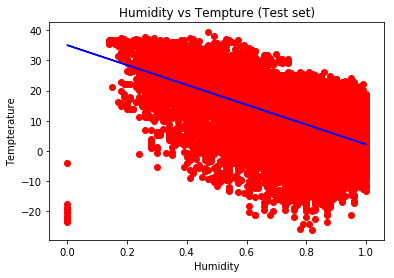

array([[ 4.41915335],
       [11.34293519],
       [14.96967806],
       ...,
       [ 3.43004166],
       [18.26671703],
       [ 4.74885725]])

In [24]:

train_lr_model('Humidity', 'Apparent Temperature (C)')

In [15]:
#using cross_validation to validate the model
x_trains = data[['Humidity']]
y_trains = data['Apparent Temperature (C)']
lr = LinearRegression()
scores = cross_val_score(lr, x_trains, y_trains, cv=7)
scores.mean(), scores.std() * 2

(0.35795145153749214, 0.08008361096421818)